In [203]:
import seaborn as sns
import os 
import numpy as np 
import pandas as pd 
from statsmodels.stats.anova import AnovaRM
import matplotlib.pyplot as plt
import pathlib as path
from scipy import stats

In [204]:
#PATH_TO_DATA = path.Path(r'C:\Users\User\Desktop\visualpilot')
PATH_TO_DATA = path.Path.cwd().parent / 'data' 
all_directories_paths = [x[0] for x in os.walk(PATH_TO_DATA) if 'batch' in x[0].split('\\')[-1] ]


In [205]:

filename = 'one_line_per_participant_all_info_valid_subjects_only.csv'
all_valid_subjects = pd.DataFrame([])
for batch in all_directories_paths:
    time_gap = path.Path(batch).parent.name
    PATH_PROCESED = batch/path.Path(filename)
    file = pd.read_csv(PATH_PROCESED,index_col=0)
    file['time_gap'] = time_gap
    file['worker_ID'] = file.index 
    file['batch_number'] = int(path.Path(batch).name.split(' ')[-1])
    
    all_valid_subjects = pd.concat([all_valid_subjects,file])


In [206]:
df_same_target_pictures = all_valid_subjects.loc[((all_valid_subjects['time_gap'] == 'pilot_same_day') & (all_valid_subjects['batch_number'] > 5)) | (all_valid_subjects['time_gap'] == 'pilot_24_hours') |(all_valid_subjects['time_gap'] == 'pilot_one_week')]

In [207]:
df_same_target_pictures

,demo_arrow_rt,demo_arrow_correct,demo_demo_accuracy,demo_RT_overall_mean,demo_RT_incorrect_mean,demo_RT_correct_mean,encoding_arrow_mean_rt,encoding_arrow_accuracy,testing_Test_overall_accuracy,testing_RT_overall_mean,...,testing_layer_1_rt,testing_layer_1_accuracy,testing_layer_2_rt,testing_layer_2_accuracy,testing_layer_3_rt,testing_layer_3_accuracy,testing_longest_response_strike,time_gap,worker_ID,batch_number
A15B4KZ3S04HS8,1.18150,1.0,0.833333,1.817267,1.517700,1.877180,1.037320,1.0,0.700000,1.876378,...,1.846558,0.85,1.623545,0.70,2.157540,0.55,4.0,pilot_24_hours,A15B4KZ3S04HS8,2
A1LA6CIGBNDOH9,0.71570,1.0,0.833333,2.468550,2.668900,2.428480,0.548300,1.0,0.733333,2.866993,...,3.093245,0.65,2.894345,0.75,2.613390,0.80,4.0,pilot_24_hours,A1LA6CIGBNDOH9,2
A22HIX1M4QXZBB,0.54510,1.0,1.000000,2.272117,NaN,2.272117,0.692460,1.0,0.583333,3.183175,...,3.372740,0.75,3.220520,0.45,2.956265,0.55,3.0,pilot_24_hours,A22HIX1M4QXZBB,2
A248QG4DPULP46,0.56340,1.0,0.833333,1.718233,1.181300,1.825620,0.539680,1.0,0.683333,3.492062,...,3.842590,0.70,3.102090,0.60,3.531505,0.75,4.0,pilot_24_hours,A248QG4DPULP46,2
A2J1DNVMJ56JG1,2.22600,1.0,0.666667,3.350233,2.205000,3.922850,1.296075,0.8,0.733333,2.486233,...,2.502740,0.65,2.616580,0.70,2.339380,0.85,7.0,pilot_24_hours,A2J1DNVMJ56JG1,2
A2J57IBR2XIWLS,1.08300,1.0,0.666667,2.974833,4.304500,2.310000,1.206400,1.0,0.616667,1.660333,...,1.622350,0.75,1.686950,0.45,1.671700,0.65,3.0,pilot_24_hours,A2J57IBR2XIWLS,2
A3MIDLO5S7FU06,0.84620,1.0,1.000000,1.414383,NaN,1.414383,0.619760,1.0,0.633333,1.988767,...,1.967465,0.70,2.069960,0.60,1.928875,0.60,5.0,pilot_24_hours,A3MIDLO5S7FU06,2
A3U0GQGAPN2DAV,1.20720,1.0,1.000000,1.760133,NaN,1.760133,1.020020,1.0,0.833333,1.859095,...,2.118780,0.95,1.652190,0.90,1.806315,0.65,5.0,pilot_24_hours,A3U0GQGAPN2DAV,2
A5P12YJP805RG,0.63460,1.0,0.833333,2.051050,2.510500,1.959160,0.505460,1.0,0.700000,1.340883,...,1.654905,0.70,1.139240,0.80,1.228505,0.60,3.0,pilot_24_hours,A5P12YJP805RG,2
ASNNAP90D5R1Z,1.18200,1.0,0.666667,3.093833,3.603000,2.839250,1.640800,1.0,0.616667,3.017153,...,3.155474,0.65,2.911750,0.80,2.991150,0.40,4.0,pilot_24_hours,ASNNAP90D5R1Z,2


In [208]:
n_same_day,n_24_hours,n_one_week =df_same_target_pictures['time_gap'].value_counts()
df_same_target_pictures['time_gap'].value_counts()

pilot_same_day    23
pilot_24_hours    16
pilot_one_week     9
Name: time_gap, dtype: int64

lets check if there are duplicate subject names , if so we drop one of there rows 

In [209]:
all_valid_subjects

,demo_arrow_rt,demo_arrow_correct,demo_demo_accuracy,demo_RT_overall_mean,demo_RT_incorrect_mean,demo_RT_correct_mean,encoding_arrow_mean_rt,encoding_arrow_accuracy,testing_Test_overall_accuracy,testing_RT_overall_mean,...,testing_layer_1_rt,testing_layer_1_accuracy,testing_layer_2_rt,testing_layer_2_accuracy,testing_layer_3_rt,testing_layer_3_accuracy,testing_longest_response_strike,time_gap,worker_ID,batch_number
A15B4KZ3S04HS8,1.1815,1.0,0.833333,1.817267,1.517700,1.877180,1.037320,1.0,0.700000,1.876378,...,1.846558,0.85,1.623545,0.70,2.157540,0.55,4.0,pilot_24_hours,A15B4KZ3S04HS8,2
A1LA6CIGBNDOH9,0.7157,1.0,0.833333,2.468550,2.668900,2.428480,0.548300,1.0,0.733333,2.866993,...,3.093245,0.65,2.894345,0.75,2.613390,0.80,4.0,pilot_24_hours,A1LA6CIGBNDOH9,2
A22HIX1M4QXZBB,0.5451,1.0,1.000000,2.272117,NaN,2.272117,0.692460,1.0,0.583333,3.183175,...,3.372740,0.75,3.220520,0.45,2.956265,0.55,3.0,pilot_24_hours,A22HIX1M4QXZBB,2
A248QG4DPULP46,0.5634,1.0,0.833333,1.718233,1.181300,1.825620,0.539680,1.0,0.683333,3.492062,...,3.842590,0.70,3.102090,0.60,3.531505,0.75,4.0,pilot_24_hours,A248QG4DPULP46,2
A2J1DNVMJ56JG1,2.2260,1.0,0.666667,3.350233,2.205000,3.922850,1.296075,0.8,0.733333,2.486233,...,2.502740,0.65,2.616580,0.70,2.339380,0.85,7.0,pilot_24_hours,A2J1DNVMJ56JG1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A1JT6ZF5PMQBM1,1.0689,1.0,0.500000,2.726167,2.928833,2.523500,1.227540,1.0,0.766667,2.048528,...,2.101920,0.80,2.107665,0.70,1.936000,0.80,7.0,pilot_same_day,A1JT6ZF5PMQBM1,7
A3QYA7EFCS7BA2,0.7878,1.0,1.000000,1.305217,NaN,1.305217,0.641820,1.0,0.833333,1.540307,...,1.472080,0.85,1.522175,0.90,1.626665,0.75,6.0,pilot_same_day,A3QYA7EFCS7BA2,7
A3EWKKJTP2GY2L,2.6520,1.0,0.833333,3.458000,1.574000,3.834800,1.280400,1.0,0.700000,1.509583,...,1.451650,0.75,1.411800,0.65,1.665300,0.70,4.0,pilot_same_day,A3EWKKJTP2GY2L,7
A2KLIBLDVDV144,0.8870,1.0,0.833333,2.137483,2.667100,2.031560,1.251675,0.8,0.800000,2.279028,...,2.669025,0.95,1.895575,0.75,2.272485,0.70,7.0,pilot_same_day,A2KLIBLDVDV144,7


In [210]:
#dup_subject_name = all_valid_subjects[all_valid_subjects.index.value_counts() > 1].index[0]
id = np.where(all_valid_subjects['worker_ID']== 'A2JLNOYPVW7W4V')[0][1]

all_valid_subjects = all_valid_subjects.reset_index(drop=True)
all_valid_subjects.drop([id],inplace=True)
all_valid_subjects = all_valid_subjects.set_index('worker_ID')
all_valid_subjects['worker_ID'] = all_valid_subjects.index

In [211]:
print(f'there are {len(all_valid_subjects.index) - len(set(all_valid_subjects.index))}, duplicate subjects')

there are 0, duplicate subjects


In [212]:


rt_df = pd.melt(df_same_target_pictures,id_vars=['worker_ID','time_gap'],value_vars=['testing_layer_1_rt','testing_layer_2_rt','testing_layer_3_rt'],var_name='layer')

accuracy_df = pd.melt(df_same_target_pictures,id_vars=['worker_ID','time_gap'],value_vars=['testing_layer_1_accuracy','testing_layer_2_accuracy','testing_layer_3_accuracy'],var_name='layer')

Text(0.5, 0.98, 'Memory preformance')

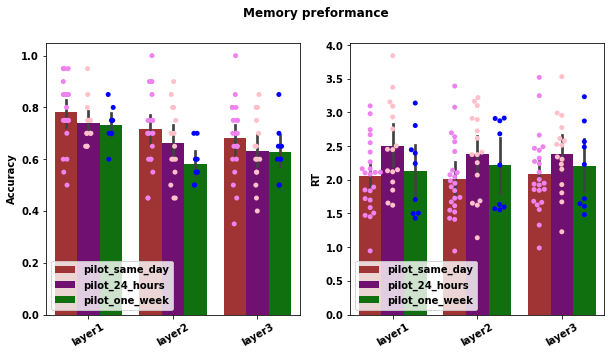

In [213]:


my_order = ['pilot_same_day','pilot_24_hours','pilot_one_week']

fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
sns.barplot(data =accuracy_df, x='layer',y='value',hue='time_gap',ax=axes[0],palette={'pilot_same_day':'firebrick','pilot_24_hours':'purple','pilot_one_week':'green'},hue_order=my_order)
sns.stripplot(data =accuracy_df, x='layer',y='value',hue='time_gap',ax=axes[0],dodge=True,palette={'pilot_same_day':'violet','pilot_24_hours':'pink','pilot_one_week':'blue'},jitter=True,hue_order=my_order)


axes[0].set_xticklabels(labels=['layer1','layer2','layer3'],rotation=30)
axes[0].set_xlabel('')
handles, labels = axes[0].get_legend_handles_labels()
axes[0].legend(handles[3:],labels[3:],loc='lower left')
axes[0].set_ylabel('Accuracy')


sns.barplot(data =rt_df, x='layer',y='value',hue='time_gap',ax=axes[1],palette={'pilot_same_day':'firebrick','pilot_24_hours':'purple','pilot_one_week':'green'},hue_order=my_order)
sns.swarmplot(data =rt_df, x='layer',y='value',hue='time_gap',ax=axes[1],palette={'pilot_same_day':'violet','pilot_24_hours':'pink','pilot_one_week':'blue'},dodge=True,hue_order=my_order)
handles, labels = axes[1].get_legend_handles_labels()
axes[1].set_xticklabels(labels=['layer1','layer2','layer3'],rotation=30)
axes[1].legend(handles[3:],labels[3:],loc='lower left')
axes[1].set_ylabel('RT')
axes[1].set_xlabel('')


fig.suptitle('Memory preformance')


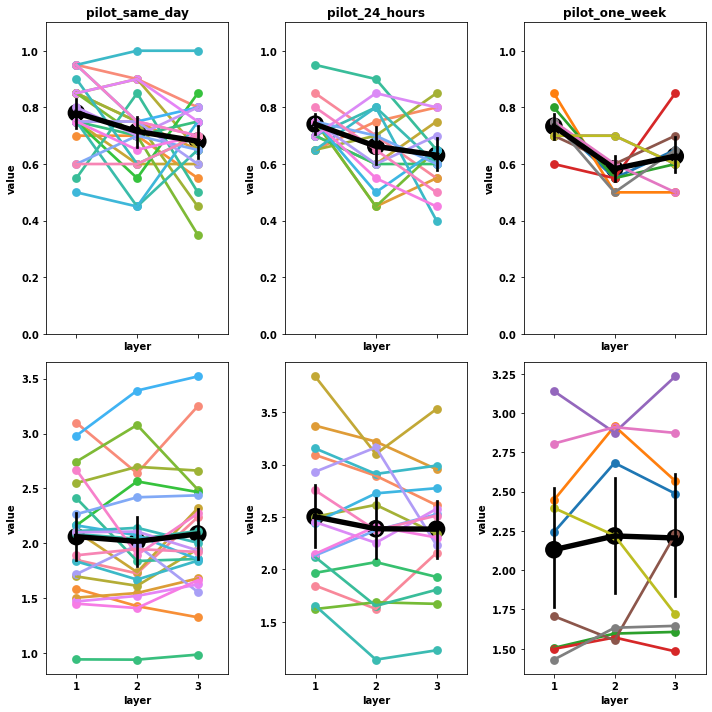

In [214]:
fig,axes=plt.subplots(nrows=2,ncols=3,figsize=(10,10),sharex=True,sharey=False)

for i,curtime in enumerate(my_order):
    #accuracy: 
    g=sns.pointplot(data=accuracy_df[accuracy_df['time_gap']==curtime],x='layer', y='value', hue='worker_ID', ax=axes[0,i])
    plt.setp(axes[0,i].lines, zorder=100)
    axes[0,i].set_ylim([0,1.1])
    sns.pointplot(data=accuracy_df[accuracy_df['time_gap']==curtime],x='layer', y='value',ax=axes[0,i],color='black',scale=2)
    plt.setp(axes[0,i].lines, zorder=200)
    axes[0,i].get_legend().remove() 
    axes[0,i].set_title(curtime)
    #rt: 
    g=sns.pointplot(data=rt_df[rt_df['time_gap']==curtime],x='layer', y='value', hue='worker_ID', ax=axes[1,i])
    plt.setp(axes[1,i].lines, zorder=100)
    sns.pointplot(data=rt_df[rt_df['time_gap']==curtime],x='layer', y='value',ax=axes[1,i],color='black',scale=2)
    plt.setp(axes[1,i].lines, zorder=200)
    plt.xticks([0,1,2],['1','2','3'])
    axes[1,i].get_legend().remove()

plt.tight_layout()

Text(0.5, 0.98, 'Memory preformance')

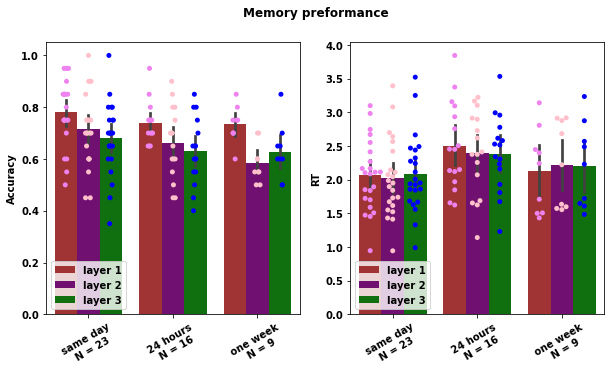

In [215]:
my_order = ['testing_layer_1_accuracy','testing_layer_2_accuracy','testing_layer_3_accuracy']

fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
bar = sns.barplot(data =accuracy_df, x='time_gap',y='value',hue='layer',ax=axes[0],palette={'testing_layer_1_accuracy':'firebrick','testing_layer_2_accuracy':'purple','testing_layer_3_accuracy':'green'},hue_order=my_order,order=['pilot_same_day','pilot_24_hours','pilot_one_week'])
sns.stripplot(data =accuracy_df, x='time_gap',y='value',hue='layer',ax=axes[0],dodge=True,palette={'testing_layer_1_accuracy':'violet','testing_layer_2_accuracy':'pink','testing_layer_3_accuracy':'blue'},hue_order=my_order,order=['pilot_same_day','pilot_24_hours','pilot_one_week'])
# axes[0].set_xticklabels(labels=['pilot_same_day','pilot_24_hours','pilot_one_week'],rotation=30)
axes[0].set_xlabel('')
axes[0].set_xticklabels(labels=[f'same day\n N = {n_same_day}',f'24 hours\n N = {n_24_hours}',f'one week\n N = {n_one_week}'],rotation=30)
handles, labels = axes[0].get_legend_handles_labels()
axes[0].legend(handles[3:],['layer 1','layer 2','layer 3'],loc='lower left')
axes[0].set_ylabel('Accuracy')



my_order = ['testing_layer_1_rt','testing_layer_2_rt','testing_layer_3_rt']

sns.barplot(data =rt_df, x='time_gap',y='value',hue='layer',ax=axes[1],palette={'testing_layer_1_rt':'firebrick','testing_layer_2_rt':'purple','testing_layer_3_rt':'green'},hue_order=my_order,order=['pilot_same_day','pilot_24_hours','pilot_one_week'])
sns.swarmplot(data =rt_df,x='time_gap',y='value',hue='layer',ax=axes[1],palette={'testing_layer_1_rt':'violet','testing_layer_2_rt':'pink','testing_layer_3_rt':'blue'},dodge=True,hue_order=my_order,order=['pilot_same_day','pilot_24_hours','pilot_one_week'])
handles, labels = axes[1].get_legend_handles_labels()
axes[1].set_xticklabels(labels=[f'same day\n N = {n_same_day}',f'24 hours\n N = {n_24_hours}',f'one week\n N = {n_one_week}'],rotation=30)
axes[1].legend(handles[3:],['layer 1','layer 2','layer 3'],loc='lower left')
axes[1].set_ylabel('RT')
axes[1].set_xlabel('')


fig.suptitle('Memory preformance')

In [216]:
# lets look at the std 
for layer in np.unique(accuracy_df['layer'].values):
    curr_df = accuracy_df[accuracy_df['layer'] == layer]
    curr_vals = curr_df['value']
    layer_num = layer.split('_')[-2]
    print(f'the std for layer {layer_num} is {curr_vals.values.std()}')

    for time in np.unique(curr_df['time_gap'].values):

        curr_vals_time = curr_df[curr_df['time_gap'] == time]['value'] 
        print(f'the std for layer {layer_num} and time gap: {time} is {curr_vals_time.values.std()}')



the std for layer 1 is 0.10374916331657276
the std for layer 1 and time gap: pilot_24_hours is 0.07545435292281022
the std for layer 1 and time gap: pilot_one_week is 0.06666666666666668
the std for layer 1 and time gap: pilot_same_day is 0.12574917273025712
the std for layer 2 is 0.1342255305653718
the std for layer 2 and time gap: pilot_24_hours is 0.1328768226591831
the std for layer 2 and time gap: pilot_one_week is 0.07071067811865472
the std for layer 2 and time gap: pilot_same_day is 0.1354820560946338
the std for layer 3 is 0.12781551375148306
the std for layer 3 and time gap: pilot_24_hours is 0.12358574958303244
the std for layer 3 and time gap: pilot_one_week is 0.10030816714037659
the std for layer 3 and time gap: pilot_same_day is 0.13492278825376436


In [218]:
all_valid_subjects.head(10)

,demo_arrow_rt,demo_arrow_correct,demo_demo_accuracy,demo_RT_overall_mean,demo_RT_incorrect_mean,demo_RT_correct_mean,encoding_arrow_mean_rt,encoding_arrow_accuracy,testing_Test_overall_accuracy,testing_RT_overall_mean,...,testing_layer_1_rt,testing_layer_1_accuracy,testing_layer_2_rt,testing_layer_2_accuracy,testing_layer_3_rt,testing_layer_3_accuracy,testing_longest_response_strike,time_gap,batch_number,worker_ID
worker_ID,,,,,,,,,,,,,,,,,,,,,
A15B4KZ3S04HS8,1.1815,1.0,0.833333,1.817267,1.5177,1.877180,1.037320,1.0,0.700000,1.876378,...,1.846558,0.85,1.623545,0.70,2.157540,0.55,4.0,pilot_24_hours,2,A15B4KZ3S04HS8
A1LA6CIGBNDOH9,0.7157,1.0,0.833333,2.468550,2.6689,2.428480,0.548300,1.0,0.733333,2.866993,...,3.093245,0.65,2.894345,0.75,2.613390,0.80,4.0,pilot_24_hours,2,A1LA6CIGBNDOH9
A22HIX1M4QXZBB,0.5451,1.0,1.000000,2.272117,NaN,2.272117,0.692460,1.0,0.583333,3.183175,...,3.372740,0.75,3.220520,0.45,2.956265,0.55,3.0,pilot_24_hours,2,A22HIX1M4QXZBB
A248QG4DPULP46,0.5634,1.0,0.833333,1.718233,1.1813,1.825620,0.539680,1.0,0.683333,3.492062,...,3.842590,0.70,3.102090,0.60,3.531505,0.75,4.0,pilot_24_hours,2,A248QG4DPULP46
A2J1DNVMJ56JG1,2.2260,1.0,0.666667,3.350233,2.2050,3.922850,1.296075,0.8,0.733333,2.486233,...,2.502740,0.65,2.616580,0.70,2.339380,0.85,7.0,pilot_24_hours,2,A2J1DNVMJ56JG1
A2J57IBR2XIWLS,1.0830,1.0,0.666667,2.974833,4.3045,2.310000,1.206400,1.0,0.616667,1.660333,...,1.622350,0.75,1.686950,0.45,1.671700,0.65,3.0,pilot_24_hours,2,A2J57IBR2XIWLS
A3MIDLO5S7FU06,0.8462,1.0,1.000000,1.414383,NaN,1.414383,0.619760,1.0,0.633333,1.988767,...,1.967465,0.70,2.069960,0.60,1.928875,0.60,5.0,pilot_24_hours,2,A3MIDLO5S7FU06
A3U0GQGAPN2DAV,1.2072,1.0,1.000000,1.760133,NaN,1.760133,1.020020,1.0,0.833333,1.859095,...,2.118780,0.95,1.652190,0.90,1.806315,0.65,5.0,pilot_24_hours,2,A3U0GQGAPN2DAV
A5P12YJP805RG,0.6346,1.0,0.833333,2.051050,2.5105,1.959160,0.505460,1.0,0.700000,1.340883,...,1.654905,0.70,1.139240,0.80,1.228505,0.60,3.0,pilot_24_hours,2,A5P12YJP805RG


## this section creates a long dataformat for all participants from the 3 possible time gaps
### cells running additional analyses on this long format: 
* checks how position in the encoding stream effects performence 
* creates a multi level logistic regression that examine the contribution of the similarity levels between each pair across the 3 defined levels



In [236]:
#read data from all time gaps: 
ALL_EXP_ALL_DATA_LOCATION=path.Path('../data/')
all_participants_results_files=list(set([sub_path.parent.parent for sub_path in list(ALL_EXP_ALL_DATA_LOCATION.rglob('*.csv')) if '-' in sub_path.name]))
#remove the sameday batches that are not 6 or 7
all_participants_batch_locations=[curpath for curpath in all_participants_results_files if (('pilot_same_day' in str(curpath)) and (curpath.name in ['batch 6','batch 7'])) 
    or ('pilot_24_hours' in str(curpath))
    or ('pilot_one_week' in str(curpath))]


In [280]:
#create a long format encoding and test dataframes: 
all_subjects_encoding_long_format_df=pd.DataFrame()
all_subjects_test_long_format_df=pd.DataFrame()
for cur_batch in all_participants_batch_locations:
    cur_sub_encoding_df=pd.read_csv(cur_batch / 'all_subjects_encoding_df.csv')
    cur_sub_test_df=pd.read_csv(cur_batch / 'all_subjects_test_df.csv')

    cur_sub_encoding_df['time_gap']=cur_batch.parent.name
    cur_sub_test_df['time_gap']=cur_batch.parent.name

    all_subjects_encoding_long_format_df=pd.concat([all_subjects_encoding_long_format_df,cur_sub_encoding_df],axis=0)
    all_subjects_test_long_format_df=pd.concat([all_subjects_test_long_format_df,cur_sub_test_df],axis=0)


all_valid_test_df_long_format=pd.DataFrame()
all_valid_encoding_df_long_format=pd.DataFrame()

for cur_sub in all_valid_subjects.index:
    cur_sub_encoding=all_subjects_encoding_long_format_df[all_subjects_encoding_long_format_df['subject']==cur_sub]
    cur_sub_test=all_subjects_test_long_format_df[all_subjects_test_long_format_df['subject']==cur_sub]


    all_valid_encoding_df_long_format=pd.concat([all_valid_encoding_df_long_format,cur_sub_encoding],axis=0)
    all_valid_test_df_long_format=pd.concat([all_valid_test_df_long_format,cur_sub_test],axis=0)

all_valid_test_df_long_format['time_gap'].value_counts()


pilot_same_day    1380
pilot_24_hours     960
pilot_one_week     540
Name: time_gap, dtype: int64

In [239]:
all_valid_encoding_df_long_format

,Unnamed: 0,index,test_encoding_response.keys,test_encoding_response.corr,trials.thisTrialN,target_image,pair,layer,correct,test_encoding_response.rt,key_resp_end.keys,subject,time_gap
0,0,20,NaN,1.0,0.0,2898635428-69104.jpg,2901943411-292945.jpg,2.0,NaN,NaN,NaN,A15B4KZ3S04HS8,pilot_24_hours
1,1,21,NaN,1.0,1.0,2874302418-65979.jpg,2238578544-111698.jpg,3.0,NaN,NaN,NaN,A15B4KZ3S04HS8,pilot_24_hours
2,2,22,NaN,1.0,2.0,2449442529-124446.jpg,2460547536-274181.jpg,2.0,NaN,NaN,NaN,A15B4KZ3S04HS8,pilot_24_hours
3,3,23,NaN,1.0,3.0,2864910426-287204.jpg,2874299429-139694.jpg,2.0,NaN,NaN,NaN,A15B4KZ3S04HS8,pilot_24_hours
4,4,24,NaN,1.0,4.0,2898624426-291546.jpg,2981235446-294900.jpg,3.0,NaN,NaN,NaN,A15B4KZ3S04HS8,pilot_24_hours
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1620,1620,80,NaN,1.0,60.0,2512875899-126682.jpg,2986447332-371497.jpg,3.0,NaN,NaN,NaN,AGB6853RIDWJ8,pilot_same_day
1621,1621,81,NaN,1.0,61.0,2446758985-197609.jpg,2981240424-145795.jpg,1.0,NaN,NaN,NaN,AGB6853RIDWJ8,pilot_same_day
1622,1622,82,NaN,1.0,62.0,2898633421-291973.jpg,2575118671-277663.jpg,2.0,NaN,NaN,NaN,AGB6853RIDWJ8,pilot_same_day
1623,1623,83,NaN,1.0,63.0,2238572663-35822.jpg,2864903351-286874.jpg,3.0,NaN,NaN,NaN,AGB6853RIDWJ8,pilot_same_day


In [240]:
#create a dataframe which allows the analysis of encoding position: 

images_position_accuracy_df=pd.DataFrame(columns=['img_name','target_layer','distractor_layer','serial_position_in_encoding','is_correct','viewed_by_encoding','viewed_by_test','distractor_side','time_gap'])
target_images=set(all_valid_encoding_df_long_format['target_image'].unique())-{'left.jpg','right.jpg'}
for cur_img in target_images:
     
    img_df=pd.DataFrame(columns=['img_name','target_layer','distractor_layer','serial_position_in_encoding','is_correct','viewed_by_encoding','viewed_by_test','distractor_side','time_gap'])
    cur_encoding_img_info=all_valid_encoding_df_long_format[all_valid_encoding_df_long_format['target_image']==cur_img]
    img_df['target_layer']=cur_encoding_img_info['layer'].values
    img_df['serial_position_in_encoding']=cur_encoding_img_info['trials.thisTrialN'].values
    img_df['viewed_by_encoding']= cur_encoding_img_info['subject'].values
    img_df['img_name']=cur_img
    img_df['time_gap']=cur_encoding_img_info['time_gap'].values
    #get from test: 
    cur_test_img_info=all_valid_test_df_long_format[(all_valid_test_df_long_format['image1']==cur_img) | (all_valid_test_df_long_format['image2']==cur_img)]

    img_df['distractor_layer']=cur_test_img_info['layer'].values
    img_df['is_correct']=cur_test_img_info['test_test_response.corr'].values
    img_df['distractor_side']=cur_test_img_info['correct'].values
    img_df['viewed_by_test']=cur_test_img_info['subject'].values

    images_position_accuracy_df=pd.concat([images_position_accuracy_df,img_df],axis=0)
#remember to change left to right and right to left: 


In [241]:
images_position_accuracy_df

,img_name,target_layer,distractor_layer,serial_position_in_encoding,is_correct,viewed_by_encoding,viewed_by_test,distractor_side,time_gap
0,2898635428-69104.jpg,2.0,2.0,0.0,1.0,A15B4KZ3S04HS8,A15B4KZ3S04HS8,left,pilot_24_hours
1,2898635428-69104.jpg,2.0,2.0,33.0,1.0,A1LA6CIGBNDOH9,A1LA6CIGBNDOH9,right,pilot_24_hours
2,2898635428-69104.jpg,2.0,2.0,31.0,0.0,A22HIX1M4QXZBB,A22HIX1M4QXZBB,left,pilot_24_hours
3,2898635428-69104.jpg,3.0,3.0,58.0,1.0,A248QG4DPULP46,A248QG4DPULP46,right,pilot_24_hours
4,2898635428-69104.jpg,3.0,3.0,28.0,1.0,A2J1DNVMJ56JG1,A2J1DNVMJ56JG1,left,pilot_24_hours
...,...,...,...,...,...,...,...,...,...
43,2901939379-143479.jpg,3.0,3.0,14.0,1.0,A1JT6ZF5PMQBM1,A1JT6ZF5PMQBM1,right,pilot_same_day
44,2901939379-143479.jpg,2.0,2.0,27.0,1.0,A3QYA7EFCS7BA2,A3QYA7EFCS7BA2,left,pilot_same_day
45,2901939379-143479.jpg,3.0,3.0,34.0,1.0,A3EWKKJTP2GY2L,A3EWKKJTP2GY2L,left,pilot_same_day
46,2901939379-143479.jpg,2.0,2.0,39.0,1.0,A2KLIBLDVDV144,A2KLIBLDVDV144,right,pilot_same_day


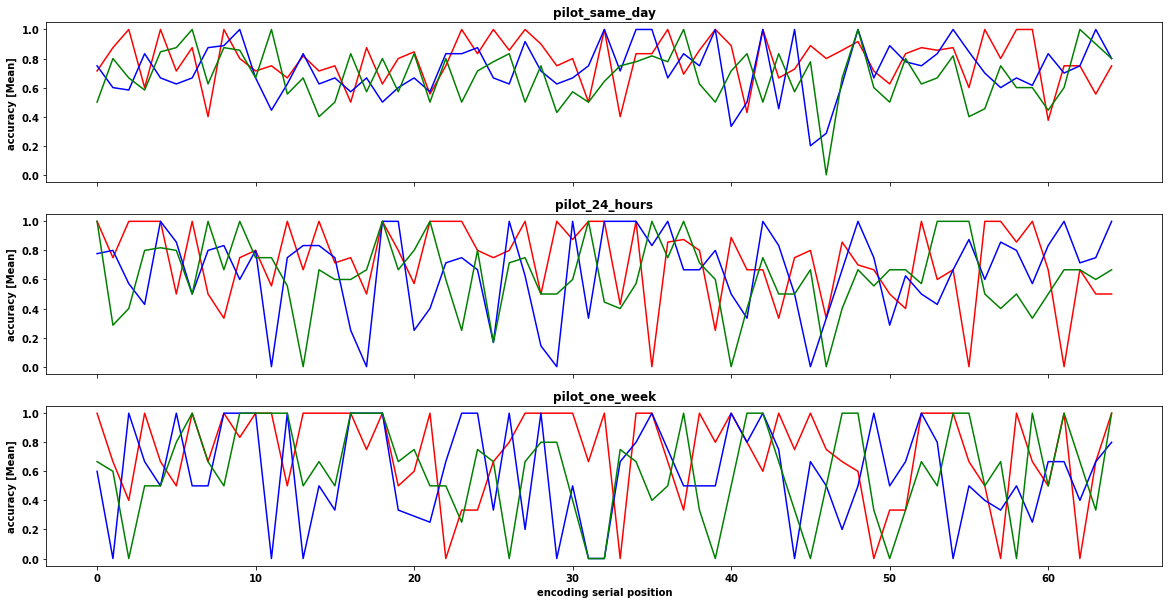

In [283]:
#create a plot for each time gap, X is target image serial position in encoding, y is the average accuracy (this analysis probably needs alot of data)
grouped_df=images_position_accuracy_df.groupby(['time_gap','distractor_layer','serial_position_in_encoding']).aggregate({'is_correct':['mean','std']})
fig,axes=plt.subplots(nrows=3,ncols=1,figsize=(20,10),sharex=True,sharey=True)
for i,cur_timegap in enumerate(['pilot_same_day','pilot_24_hours','pilot_one_week']):
    grouped_df.loc[cur_timegap, 1.0]['is_correct', 'mean'].plot(ax=axes[i],color='r')
    grouped_df.loc[cur_timegap, 2.0]['is_correct', 'mean'].plot(ax=axes[i],color='b')
    grouped_df.loc[cur_timegap, 3.0]['is_correct', 'mean'].plot(ax=axes[i],color='g')
    axes[i].set_title(cur_timegap)
    axes[i].set_xlabel('encoding serial position')
    axes[i].set_ylabel('accuracy [Mean]')



In [284]:
#here we do some statistics: mixed effects (1 between (time gap - 3 levels) and 1 within factors (layer representation - 3 levels)) and some assumption checks
import pingouin as pg

#check for sphercity assumption" 
print('\n---sphericity assumption----------')
print(pg.sphericity(data=accuracy_df, dv='value', subject='worker_ID', within='layer')[-1])

#homoscedasticity
print('\n---homoscedasticity assumption---')
for layer_val in accuracy_df['layer'].unique():
    print(f'layer: {layer_val}:')
    print(pg.homoscedasticity(accuracy_df[accuracy_df['layer']==layer_val], dv='value', group='time_gap'))

#mixed anova:""
print('\n-----anova results--------------')
print(pg.mixed_anova(dv='value', between='time_gap', within='layer', subject='worker_ID', data=accuracy_df))

#assumption of normality: 
print('\n-----normality assumption-------')
accuracy_df['factor_comb']=accuracy_df["layer"] + '_'+accuracy_df["time_gap"]
print(pg.normality(accuracy_df, dv='value', group='factor_comb'))


print('\n---------anova results----------')
print(pg.mixed_anova(dv='value', between='time_gap', within='layer', subject='worker_ID', data=accuracy_df))




---sphericity assumption----------
0.3008805177582871

---homoscedasticity assumption---
layer: testing_layer_1_accuracy:
               W      pval  equal_var
levene  2.798665  0.071517       True
layer: testing_layer_2_accuracy:
               W      pval  equal_var
levene  1.508342  0.232251       True
layer: testing_layer_3_accuracy:
               W      pval  equal_var
levene  0.339727  0.713775       True

-----anova results--------------
        Source        SS  DF1  DF2        MS          F     p-unc       np2  \
0     time_gap  0.136543    2   45  0.068271   3.565200  0.036537  0.136780   
1        layer  0.295972    2   90  0.147986  11.720452  0.000030  0.206635   
2  Interaction  0.030993    4   90  0.007748   0.613656  0.653890  0.026550   

        eps  
0       NaN  
1  0.951584  
2       NaN  

-----normality assumption-------
                                                W      pval  normal
testing_layer_1_accuracy_pilot_24_hours  0.862033  0.020584   False
testin

In [285]:
#this section adds the similarity value of each traget-distrator pair across the 3 levels of similarity: 
similarity_df=pd.read_csv(PATH_TO_DATA.parent / 'similarity_fungi_all.csv')
similarity_df['image1']=similarity_df['image1'].str.replace('.pkl','.jpg',regex=True)
similarity_df['image2']=similarity_df['image2'].str.replace('.pkl','.jpg',regex=True)
similarity_df.head(10)

,Unnamed: 0,image1,image2,level_0,level_1,level_2,level_3,level_4,level_5,level_6,model,category1,category2
0,0,2237852066-222666.jpg,2237852066-222668.jpg,0.518216,0.424106,0.310927,0.313127,0.476530,0.778986,0.806504,VGG,NaN,NaN
1,1,2237852066-222666.jpg,2237852112-297894.jpg,0.535670,0.424132,0.298994,0.253748,0.283725,0.455499,0.373751,VGG,NaN,NaN
2,2,2237852066-222666.jpg,2237852154-74691.jpg,0.481043,0.395120,0.272803,0.192258,0.149006,0.293096,0.332969,VGG,NaN,NaN
3,3,2237852066-222666.jpg,2237852154-74692.jpg,0.476910,0.387269,0.250685,0.172855,0.165147,0.289664,0.338491,VGG,NaN,NaN
4,4,2237852066-222666.jpg,2237852217-297922.jpg,0.515995,0.417424,0.292037,0.240059,0.287781,0.503523,0.489363,VGG,NaN,NaN
5,5,2237852066-222666.jpg,2237852312-297949.jpg,0.469598,0.393366,0.277855,0.219055,0.251109,0.448217,0.451099,VGG,NaN,NaN
6,6,2237852066-222666.jpg,2237852599-74797.jpg,0.484514,0.401472,0.277583,0.201425,0.205353,0.411307,0.413567,VGG,NaN,NaN
7,7,2237852066-222666.jpg,2237852599-74799.jpg,0.468577,0.381592,0.259252,0.191430,0.172633,0.267916,0.265419,VGG,NaN,NaN
8,8,2237852066-222666.jpg,2237852599-74801.jpg,0.478278,0.403392,0.272132,0.171903,0.204134,0.454548,0.530565,VGG,NaN,NaN
9,9,2237852066-222666.jpg,2237852627-298027.jpg,0.463589,0.396531,0.278161,0.191636,0.160252,0.296555,0.267093,VGG,NaN,NaN


In [286]:
 (PATH_TO_DATA / 'long_format_test_with_similarity.csv').exists()

True

In [292]:
#add the similarity columns to the long data format:
 
if (PATH_TO_DATA / 'long_format_test_with_similarity.csv').exists():
    print('loading a pre existing long dataframe with similarity values\nlocated at:',PATH_TO_DATA / 'long_format_test_with_similarity.csv')
    all_valid_test_df_long_format=pd.read_csv(PATH_TO_DATA / 'long_format_test_with_similarity.csv')
else: 
    print('calculating a long dataframe with similarity values')
    sim_levels_colnames=[colname for colname in similarity_df.columns if 'level_' in colname]

    #get all unique pairs: 
    all_pairs=[set([img1,img2]) for img1,img2 in all_valid_test_df_long_format[['image1','image2']].values]
    all_unique_pairs=[]
    for pair in all_pairs:
        if pair not in all_unique_pairs:
            all_unique_pairs.append(pair)

    print(f'running on {len(all_unique_pairs)} options of the displayed image pairs: extracting thier similarity level across all layers')

    for img1,img2 in all_unique_pairs:
        #get all the instances from the long format data that contains this pair: 
        all_valid_test_df_long_format.loc[((all_valid_test_df_long_format['image1']==img1) & (all_valid_test_df_long_format['image2']==img2)) 
            | ((all_valid_test_df_long_format['image1']==img2) & (all_valid_test_df_long_format['image2']==img1)),sim_levels_colnames]=similarity_df.loc[((similarity_df['image1']==img1) & (similarity_df['image2']==img2)) 
            | ((similarity_df['image1']==img2) & (similarity_df['image2']==img1)),sim_levels_colnames].values[0,:].tolist()

    #save
    all_valid_test_df_long_format.to_csv(PATH_TO_DATA / 'long_format_test_with_similarity.csv',index=False)   

loading a pre existing long dataframe with similarity values
located at: c:\Users\d_abe\Desktop\human similarity database\edens github repo\Visual-memory-task\data\long_format_test_with_similarity.csv


In [294]:
all_valid_test_df_long_format.rename(columns={'test_test_response.corr':'is_correct','test_test_response.rt':'rt','trials_2.thisTrialN':'trial_num'},inplace=True)

#taken from the create_rmd script: (our defitnions of 3 similarity levels across the network heirarchy)
#levels = [['level_0'],['level_1','level_2','level_3'],['level_4','level_5','level_6']]
#create grouped sim values: 
all_valid_test_df_long_format['sim_layer_1']=all_valid_test_df_long_format['level_0']
all_valid_test_df_long_format['sim_layer_2']=all_valid_test_df_long_format[['level_1','level_2','level_3']].mean(axis=1)
all_valid_test_df_long_format['sim_layer_3']=all_valid_test_df_long_format[['level_4','level_5','level_6']].mean(axis=1)


,Unnamed: 0,layer,correct,test_test_response.keys,is_correct,rt,trials_2.thisRepN,trial_num,trials_2.thisN,trials_2.thisIndex,...,level_0,level_1,level_2,level_3,level_4,level_5,level_6,sim_layer_1,sim_layer_2,sim_layer_3
0,0,3.0,right,right,1.0,9.1912,0.0,0.0,0.0,0.0,...,0.431309,0.373657,0.283569,0.228594,0.396416,0.665625,0.778017,0.431309,0.295273,0.613353
1,1,3.0,right,left,0.0,1.1568,0.0,1.0,1.0,1.0,...,0.359904,0.316925,0.223592,0.183424,0.349852,0.581514,0.672709,0.359904,0.241314,0.534692
2,2,2.0,right,right,1.0,1.6708,0.0,2.0,2.0,2.0,...,0.477991,0.405821,0.291286,0.225193,0.194664,0.417241,0.382345,0.477991,0.307433,0.331417
3,3,1.0,left,left,1.0,2.5987,0.0,3.0,3.0,3.0,...,0.519996,0.349486,0.247940,0.171409,0.192660,0.334500,0.346288,0.519996,0.256278,0.291149
4,4,1.0,left,left,1.0,1.6051,0.0,4.0,4.0,4.0,...,0.593457,0.482546,0.388304,0.358967,0.298336,0.587184,0.638144,0.593457,0.409939,0.507888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2875,1494,1.0,left,left,1.0,1.4502,0.0,55.0,55.0,55.0,...,0.526345,0.409459,0.249727,0.220685,0.203611,0.329252,0.336317,0.526345,0.293290,0.289727
2876,1495,3.0,right,right,1.0,1.7124,0.0,56.0,56.0,56.0,...,0.454461,0.398493,0.313248,0.277669,0.404035,0.632153,0.693766,0.454461,0.329804,0.576651
2877,1496,2.0,right,right,1.0,4.5710,0.0,57.0,57.0,57.0,...,0.416978,0.372799,0.311147,0.306273,0.269793,0.415857,0.460234,0.416978,0.330073,0.381962
2878,1497,2.0,left,right,0.0,1.1815,0.0,58.0,58.0,58.0,...,0.476582,0.430353,0.357012,0.407089,0.474696,0.656463,0.641331,0.476582,0.398152,0.590830


In [303]:
all_valid_test_df_long_format['time_gap_numeric']=all_valid_test_df_long_format['time_gap'].map({'pilot_same_day':'0','pilot_24_hours':'1','pilot_one_week':'2'})
all_valid_test_df_long_format['time_gap_numeric'].value_counts()

0    1380
1     960
2     540
Name: time_gap_numeric, dtype: int64

In [295]:
#this section runs a logistic regression seperately for each time scale, it predicts the correctness of the image pair during test, according to its similarity across the 3 defined levels: 
from statsmodels.genmod.bayes_mixed_glm import BinomialBayesMixedGLM

for cur_timegap in ['pilot_same_day','pilot_24_hours','pilot_one_week']:
    random = {"a": '0 + C(subject)'}
    model = BinomialBayesMixedGLM.from_formula(
                'is_correct ~ sim_layer_1 + sim_layer_2 + sim_layer_3', random, all_valid_test_df_long_format[all_valid_test_df_long_format['time_gap']==cur_timegap])
    result = model.fit_vb()
    print(f'time game: {cur_timegap}',result.summary())




time game: pilot_24_hours                 Binomial Mixed GLM Results
            Type Post. Mean Post. SD   SD  SD (LB) SD (UB)
----------------------------------------------------------
Intercept      M     2.0499   0.0698                      
sim_layer_1    M     0.0893   0.1423                      
sim_layer_2    M    -1.2288   0.2136                      
sim_layer_3    M    -1.9854   0.1397                      
a              V    -1.4439   0.1822 0.236   0.164   0.340
Parameter types are mean structure (M) and variance
structure (V)
Variance parameters are modeled as log standard deviations
time game: pilot_same_day                 Binomial Mixed GLM Results
            Type Post. Mean Post. SD   SD  SD (LB) SD (UB)
----------------------------------------------------------
Intercept      M     1.5527   0.0618                      
sim_layer_1    M     1.5875   0.1263                      
sim_layer_2    M    -0.7952   0.1894                      
sim_layer_3    M    -2.1948  

In [305]:
random = {"a": '0 + C(subject)'}
model = BinomialBayesMixedGLM.from_formula(
            'is_correct ~ time_gap_numeric*sim_layer_1 + time_gap_numeric*sim_layer_2 + time_gap_numeric*sim_layer_3', random, all_valid_test_df_long_format)
result = model.fit_vb()
print(result.summary())

                           Binomial Mixed GLM Results
                                  Type Post. Mean Post. SD   SD  SD (LB) SD (UB)
--------------------------------------------------------------------------------
Intercept                            M     1.7485   0.0412                      
time_gap_numeric[T.1]                M     0.5017   0.0701                      
time_gap_numeric[T.2]                M    -0.3272   0.0913                      
sim_layer_1                          M     1.5562   0.0841                      
time_gap_numeric[T.1]:sim_layer_1    M    -1.2142   0.1431                      
time_gap_numeric[T.2]:sim_layer_1    M     0.5149   0.1854                      
sim_layer_2                          M    -1.7263   0.1262                      
time_gap_numeric[T.1]:sim_layer_2    M    -0.3284   0.2143                      
time_gap_numeric[T.2]:sim_layer_2    M    -2.3349   0.2778                      
sim_layer_3                          M    -2.0002   0.0

In [306]:
all_valid_test_df_long_format.groupby('layer').aggregate({'sim_layer_1':['mean','std'],'sim_layer_2':['mean','std'],'sim_layer_3':['mean','std']})

sim_layer_1           sim_layer_2           sim_layer_3          
             mean       std        mean       std        mean       std
layer                                                                  
1.0      0.529546  0.049981    0.301461  0.043598    0.363869  0.107539
2.0      0.474218  0.049498    0.346073  0.040997    0.475554  0.112412
3.0      0.461078  0.057114    0.310736  0.043064    0.565040  0.086812